# Lab 9 - Dense Neural Network
## Sudhan Shrestha [8889436]

1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points). 

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

*Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.*

In [20]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [21]:
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('***********************')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:') 
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('***********************')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
***********************
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
***********************
Image Data Range:
Min: 0
Max: 255


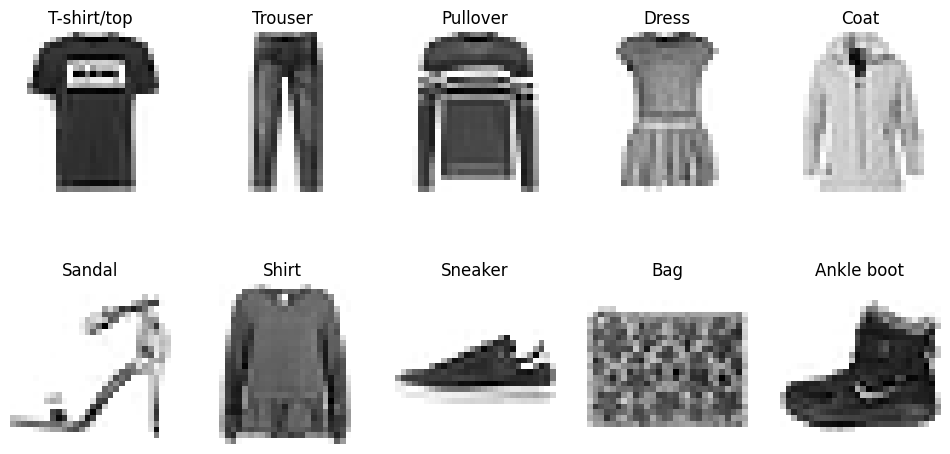

In [22]:
image_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
# Display a single unique image from each class
plt.figure(figsize=(12, 6))
unique_images = np.unique(train_labels)
for i, image_index in enumerate(unique_images):
    plt.subplot(2, 5, i + 1)
    index = np.where(train_labels == image_index)[0][0]
    plt.imshow(train_images[index], cmap='binary')
    plt.title(image_labels[image_index])
    plt.axis('off')
plt.show()

Data preprossing

In [23]:
# flattening the 28x28 image into  1 dimension
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

print('Shapes after flattening:')
print('Train Data:')
print(f'Images: {train_images.shape}')
print('Test Data:') 
print(f'Images: {test_images.shape}')


Shapes after flattening:
Train Data:
Images: (60000, 784)
Test Data:
Images: (10000, 784)


In [24]:
# Normalizing the image pixels values to 0 and 1
train_images = train_images.astype("float32") / 255  # normalizing the data to the range [0,1] by min-max range, and casting it to float32
test_images = test_images.astype("float32") / 255

In [25]:
print(train_images.min())
print(train_images.max())
print(train_images.shape)
print(train_images[0].shape)

0.0
1.0
(60000, 784)
(784,)


2. Train a dense neural network using Keras (2 points)

In [26]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5611 - accuracy: 0.8011
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3853 - accuracy: 0.8595
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3406 - accuracy: 0.8747
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3125 - accuracy: 0.8840
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2948 - accuracy: 0.8908


In [27]:
prediction = model.predict(test_images)
prediction  


313/313 [==============================] - 0s 1ms/step


array([[4.8163502e-06, 2.4697486e-06, 1.2630685e-06, ..., 5.4517366e-02,
        4.3860084e-05, 8.5896242e-01],
       [2.5852084e-06, 1.6279167e-11, 9.9995244e-01, ..., 8.3773591e-14,
        2.5523159e-10, 1.0283981e-14],
       [2.2268210e-08, 1.0000000e+00, 1.0461888e-09, ..., 1.0026696e-12,
        7.1666488e-12, 1.0251735e-12],
       ...,
       [7.7282653e-05, 1.1126848e-09, 9.3978699e-05, ..., 1.6740689e-06,
        9.9970764e-01, 1.6406194e-09],
       [1.5441270e-08, 9.9999917e-01, 8.1191169e-09, ..., 3.4177201e-09,
        1.2263600e-09, 2.2964063e-08],
       [5.1442705e-05, 8.8020761e-06, 9.0045716e-05, ..., 3.0122485e-03,
        5.7490129e-04, 1.9373148e-05]], dtype=float32)

In [28]:
predicted_labels = np.argmax(prediction, axis=1)
print(predicted_labels)

[9 2 1 ... 8 1 5]


3. Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration (2 points)

In [29]:

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)



Test Accuracy: 86.38%
313/313 [==============================] - 0s 1ms/step


In [30]:
# Confusion matrix
confusion_matrix = tf.math.confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_matrix.numpy())

Confusion Matrix:
[[912   2  40  17   4   1  16   0   8   0]
 [  1 979   4  13   2   0   1   0   0   0]
 [ 22   1 909   5  50   0  13   0   0   0]
 [ 30  23  32 861  42   0   8   0   4   0]
 [  0   1 224  22 739   0  14   0   0   0]
 [  0   0   0   1   0 968   0  19   1  11]
 [252   1 201  23 101   0 414   0   8   0]
 [  0   0   0   0   0  25   0 963   1  11]
 [  4   0  12   2   6   4   8   3 961   0]
 [  0   0   0   0   0  12   1  55   0 932]]


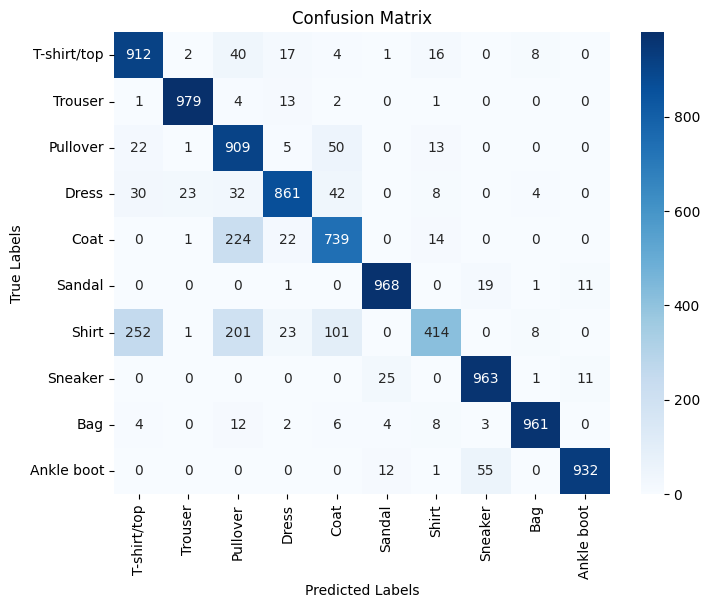

In [31]:

# the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=image_labels.values(), yticklabels=image_labels.values())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [37]:
# Explore specific examples of incorrect classifications
misclassified_indices = np.where(predicted_labels != test_labels)[0]
print('Total number of incorrect indices',len(misclassified_indices))
num_examples = 5


Total number of incorrect indices 1362



Exploring Incorrect Classifications:


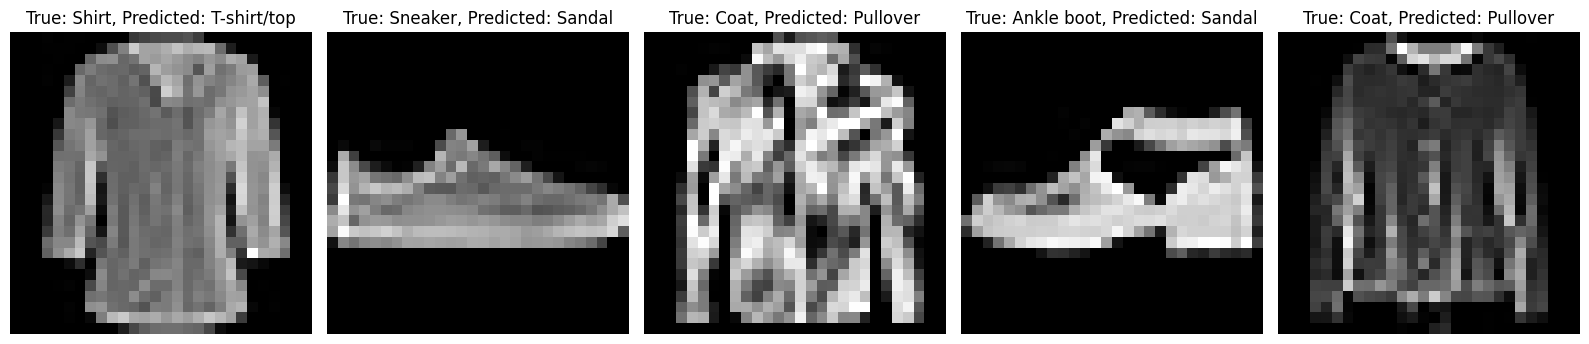

In [48]:
print("\nExploring Incorrect Classifications:")
plt.figure(figsize=(16, 9))
for i, idx in enumerate(misclassified_indices[:num_examples]):
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {image_labels[test_labels[idx]]}, Predicted: {image_labels[predicted_labels[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()